# Example Usage

In [1]:

import torch
from numericrf import NumericRF, get_bounds

shape = [1, 3, 60, 90]
convs = torch.nn.Sequential(
                                torch.nn.Conv2d(shape[1], 16, (5,3), stride=(3,2)),
                                torch.nn.Conv2d(16, 16, (5,3), stride=2),
                                torch.nn.Conv2d(16, 16, 3, padding=1),
                                torch.nn.Conv2d(16, 8, 3),
        )

rf = NumericRF(convs, shape)

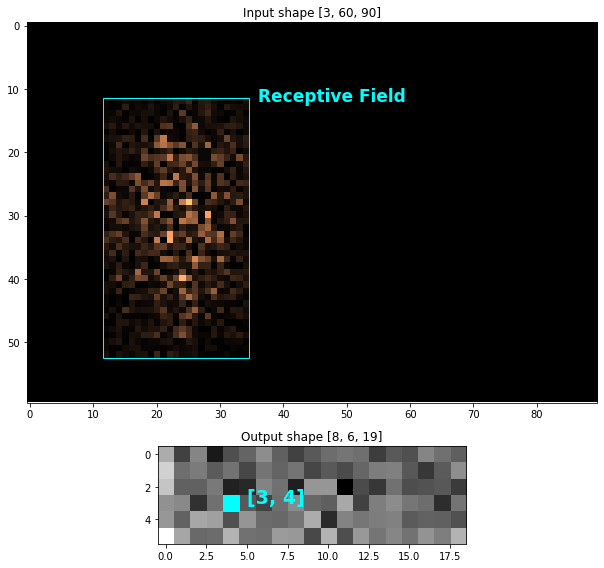

In [2]:
rf.heatmap((3,4))

rf.plot(None, True)

# Validation test

In order to verify the receptive field, we can pass an input that is **non-zero everywhere except in the RF**. This should give an output that is (mostly) non-zero everywhere other than the chosen position.

In [62]:
import matplotlib.pyplot as plt
shape = [1, 3, 60, 90]
convs = torch.nn.Sequential(
                            torch.nn.Conv2d(shape[1], 16, 5, stride=2),
                            torch.nn.Conv2d(16, 16, 3, stride=2),
                            torch.nn.Conv2d(16, 16, 3),
                            torch.nn.Conv2d(16, 8, 3),
        )

# Important to zero out bias terms that would add uniform noise to the output
for conv in convs:
    conv.bias.data.fill_(0)
    conv.bias.requires_grad = False

rf = NumericRF(convs, shape)
rf.heatmap((3,4))
i = rf.info
i

{'h': {'bounds': (12, 36), 'range': 24},
 'w': {'bounds': (16, 40), 'range': 24}}

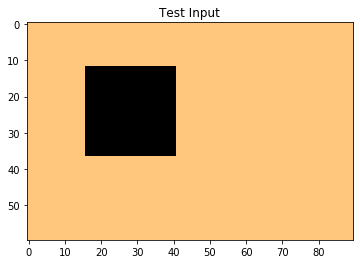

In [115]:
# Set up input

testt = torch.ones(shape)
testt[..., i['h']['bounds'][0]:i['h']['bounds'][1]+1, 
           i['w']['bounds'][0]:i['w']['bounds'][1]+1] = 0

plt.imshow(testt.mean([0,1]).detach().numpy(), cmap='copper', interpolation='nearest')
plt.title("Test Input")

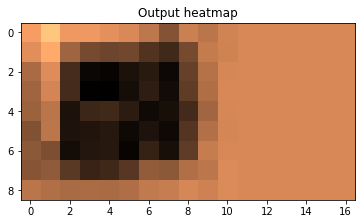

In [111]:
# Get Output Heatmap
out = convs(testt).mean([0,1]).detach().abs().numpy()
plt.imshow(out, cmap='copper', interpolation='nearest')
plt.title("Output heatmap")


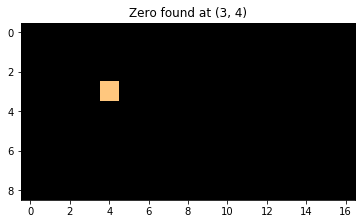

In [110]:
# Verify
p = tuple(map(lambda x: x[0], (out==0).nonzero()))
plt.imshow(out==0.0, cmap='copper', interpolation='nearest')
plt.title("Zero found at %s"%str(p))